# MODEL DEVELOPMENT

## Step 1. Launch & Environment Set up

### A. Set up Libraries and Packages 

Installing and Instantiating right libraries

In [483]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
%matplotlib inline

from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

<Figure size 2000x1000 with 0 Axes>

### B. Read data 

In [484]:
iris=datasets.load_iris()

In [485]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Look at a portion of data

In [486]:
iris.data[0:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### C. Read the predictor variables

Look at the name of the dataset variables

In [487]:
print("Features:")
print(iris.feature_names,end='\n\n')

print("target categories:")
print(iris.target_names)

Features:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

target categories:
['setosa' 'versicolor' 'virginica']


Create the variables that define the predictor variables and the target

In [488]:
feature_names=iris.feature_names
target_names=iris.target_names

In [489]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [490]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### D. Data Validation 

In [491]:
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])

In [492]:
df_iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


The minimum, maximum and other basic information is checked to ensure that there are no null values​

In [493]:
df_iris.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


The dimensions of the dataframe are showed​

In [494]:
'150 rows, 5 columns'
df_iris.shape

(150, 5)

In [495]:
'rows*columns'
df_iris.size

750

### E. Checking the type of the problem

We see that it is a Supervised case where it is a classification problem to detect the type of flower

In [496]:
df_iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


#### Objective variable

It' is a multivariate case, you have 3 different outputs

*target='0'  : Setosa*

*target='1'  : Versicolor*

*target='2'  : Virginica*

## Step 2. Data Wrangling

### A. Create new columns 

we define the species variable for a better understanding

In [497]:
# Create a empty list
species = []

for i in range(len(df_iris['target'])):
    if df_iris['target'][i] == 0:
        species.append("setosa")
    elif df_iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')

In [498]:
type(species)

list

We add new column in df_iris dataset object

In [499]:
df_iris['species'] = species

In [500]:
df_iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [501]:
df_iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

### B. Transform Data types

In [502]:
df_iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
species               object
dtype: object

In [503]:
feat_categorical = ['species']

In [504]:
for var in feat_categorical:
    df_iris[var] = df_iris[var].astype('category')

In [505]:
v=pd.DataFrame({"variable": df_iris.columns.values})
t=pd.DataFrame({"tipo": df_iris.dtypes.values})
meta = pd.concat([v, t], axis=1).iloc[:,:]
meta

,variable,tipo
0,sepal length (cm),float64
1,sepal width (cm),float64
2,petal length (cm),float64
3,petal width (cm),float64
4,target,float64
5,species,category


### C. Remove nulls

check the its min, max and other basic information to make sure we don't have outliers

In [506]:
df_iris.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,1.000000,NaN
std,0.828066,0.435866,1.765298,0.762238,0.819232,NaN
min,4.300000,2.000000,1.000000,0.100000,0.000000,NaN
25%,5.100000,2.800000,1.600000,0.300000,0.000000,NaN
50%,5.800000,3.000000,4.350000,1.300000,1.000000,NaN
75%,6.400000,3.300000,5.100000,1.800000,2.000000,NaN


In [507]:
df_iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

we can see that no null values are found in the dataset

## Step 3. EDA for a CustomML project

### A. Univariate Analysis 

Let’s first create some univariate plots, through a histogram for each feature

In [508]:
# It indicates the number of separating spaces 
n_bins = 50

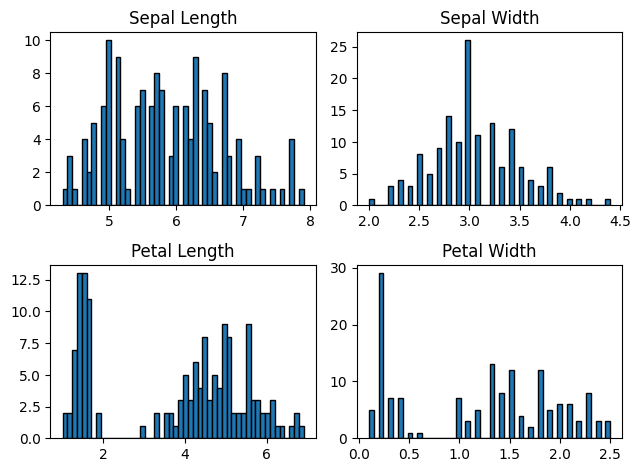

In [509]:
# It indicates the size of the window
#plt.figure(figsize=(20,10))
fig, axs = plt.subplots(2, 2)

axs[0,0].hist(df_iris['sepal length (cm)'], bins = n_bins,edgecolor ='black');
axs[0,0].set_title('Sepal Length');

axs[0,1].hist(df_iris['sepal width (cm)'], bins = n_bins,edgecolor ='black');
axs[0,1].set_title('Sepal Width');

axs[1,0].hist(df_iris['petal length (cm)'], bins = n_bins,edgecolor ='black');
axs[1,0].set_title('Petal Length');

axs[1,1].hist(df_iris['petal width (cm)'], bins = n_bins,edgecolor ='black');
axs[1,1].set_title('Petal Width');

# Add some spacing between subplots
fig.tight_layout(pad=1.0);

Note that for both petal_length and petal_width, there seems to be a group of data points that have smaller values than the others, suggesting that there might be different groups in this data.

Next, let’s try some side-by-side box plots

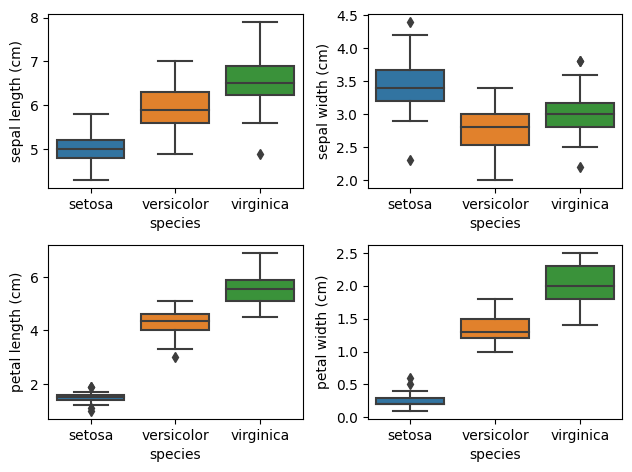

In [510]:
fig, axs = plt.subplots(2, 2)

cn = ['setosa', 'versicolor', 'virginica']

sns.boxplot(x = 'species', y = 'sepal length (cm)', data = df_iris, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'species', y = 'sepal width (cm)', data = df_iris, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'species', y = 'petal length (cm)', data = df_iris, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'species', y = 'petal width (cm)', data = df_iris,  order = cn, ax = axs[1,1]);

# add some spacing between subplots
fig.tight_layout(pad=1.0);

We can see that the graphs associated with Setosa are of lesser value for the sepal length, petal length, petal width; however, with respect to sepal width, it has a greater value with the rest of the categories of the target

### B. Bivariate Analysis

In [511]:
cols_bi = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','species']

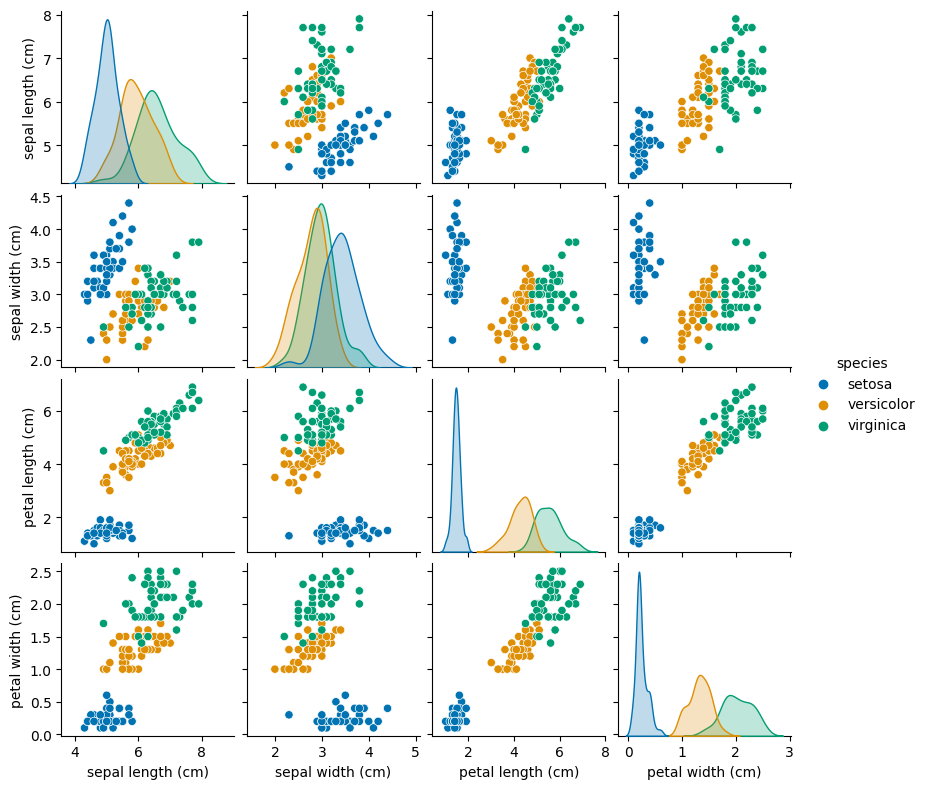

In [512]:
sns.pairplot(df_iris[cols_bi],hue="species", height = 2, palette = 'colorblind');

Note that some variables seem to be highly correlated, e.g., petal_length and petal_width. In addition, the petal measurements separate the different species better than the sepal ones.

Next, let’s make a correlation matrix to quantitatively examine the relationship between variables:



In [513]:
df_iris[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


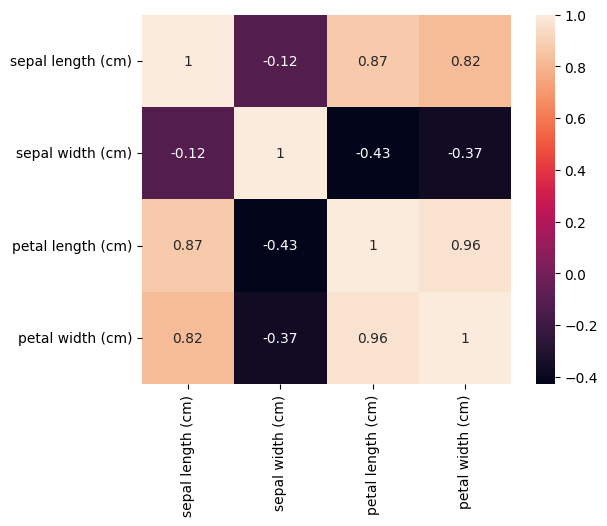

In [514]:
corrmat = df_iris[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
sns.heatmap(corrmat, annot = True, square = True);

The main takeaway is that the 'petal_' measurements have highly positive correlation, while the sepal one are uncorrelated. Note that the 'petal_' features also have relatively high correlation with 'sepal_length', but not with 'sepal_width'.

## Step 4. Data Preparation

In [515]:
# Data
X=iris.data
y=iris.target

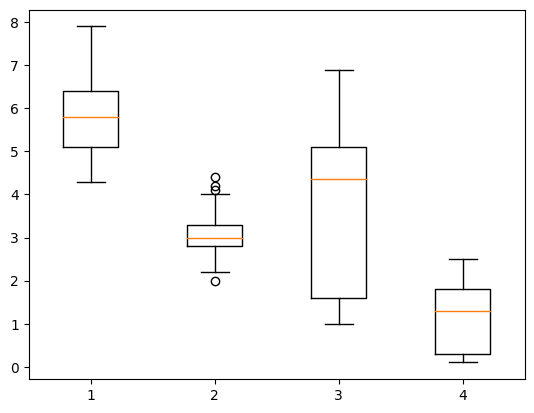

In [516]:
# Boxplot with X
plt.boxplot(X)
plt.show()

### A. Scaling Data

In [517]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [518]:
# Instantiate scaler object
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled_features = scaler.transform(X)

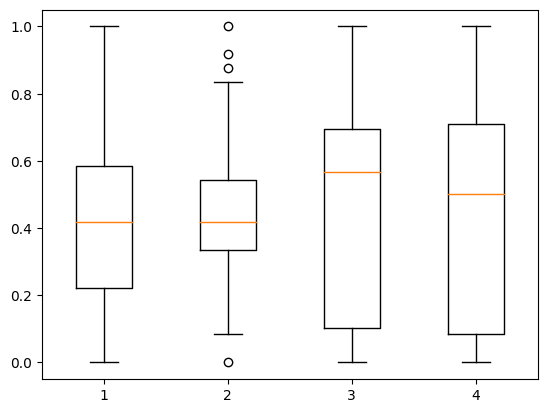

In [519]:
# Box plot with scaled features
plt.boxplot(X_scaled_features)
plt.show()

### B. Data partitioning

Split the data. 70% of the data is used as training data (X_train, y_train) and 30% as test data (X_test, y_test)

In [520]:
# Split the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_scaled_features,
                                               y,
                                               test_size=.3,
                                               random_state = 20)

## Step 5. Modelling for CustomML

### A. Instantiate the Machine Learning Algorithm

Instantiate the algorithm from scikit-learn library that will be used for this classification problem. In this case, KNeighborsClassifier is the selected algorithm that implements k-nearest neighbors vote.

In [521]:
from sklearn.neighbors import KNeighborsClassifier

### B. Apply Cross Validation

In [522]:
from sklearn.model_selection import StratifiedKFold

We use the StratifiedKfold technique that allows us to uniformly balance the target in each fold

In [523]:
skf = StratifiedKFold(n_splits= 3,shuffle=True, random_state = 20)

### C. Apply GridSearchCV

In [524]:
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'n_neighbors': [6,7,8,9,10,12,15,18,20,25,30],
    'weights': ['uniform','distance']
                 }

grid_knn = GridSearchCV(
        estimator  = KNeighborsClassifier(),
        param_grid = param_grid_knn,
        scoring    = 'accuracy',
        cv         = skf
       )

### D. Train process using GridSearchCV and CrossValidation techniques

In [525]:
grid_knn.fit(X = X_train, y = y_train)

c:\Users\laren.osorio\.conda\envs\enc_api_ml\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\laren.osorio\.conda\envs\enc_api_ml\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=20, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [6, 7, 8, 9, 10, 12, 15, 18, 20, 25,
                                         30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

Results associated to all the combinations

In [526]:
result_knn = pd.DataFrame(grid_knn.cv_results_)
result_knn.drop(columns = 'params',inplace=True)
result_knn.sort_values('mean_test_score',ascending=False).head(7)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
15,0.000666,0.000471,0.000333,0.000471,18,distance,0.971429,1.000000,0.971429,0.980952,0.013469,1
21,0.000334,0.000472,0.000668,0.000472,30,distance,0.971429,1.000000,0.942857,0.971429,0.023328,2
19,0.000440,0.000330,0.000734,0.000526,25,distance,0.971429,1.000000,0.942857,0.971429,0.023328,2
17,0.000064,0.000090,0.000936,0.000091,20,distance,0.971429,1.000000,0.942857,0.971429,0.023328,2
12,0.000895,0.000147,0.001667,0.000471,15,uniform,0.971429,1.000000,0.942857,0.971429,0.023328,2
9,0.000667,0.000471,0.000634,0.000450,10,distance,0.971429,0.971429,0.971429,0.971429,0.000000,6
13,0.000377,0.000267,0.000669,0.000592,15,distance,0.971429,0.971429,0.971429,0.971429,0.000000,6


### E. Using the best values of the hyperparameters

Better hyperparameters by cross validation

In [527]:
print("Best found hyperparameters (cv)")
print(grid_knn.best_params_, ":", grid_knn.best_score_, grid_knn.scoring)

Best found hyperparameters (cv)
{'n_neighbors': 18, 'weights': 'distance'} : 0.980952380952381 accuracy


Choosing the model with the best accuracy

In [528]:
model_knn = grid_knn.best_estimator_

Validate again that the model has stability on the data

In [529]:
from sklearn.model_selection import cross_val_score

cross_val = cross_val_score(cv = skf,
                           estimator = model_knn,
                           X=X_train,
                           y=y_train, 
                           scoring = 'accuracy') # 'auc_roc'

print("All scores:",cross_val)
print("Average of the scores:",np.mean(cross_val))
print("Standard deviation of the scores:", np.std(cross_val))

All scores: [0.97142857 1.         0.97142857]
Average of the scores: 0.980952380952381
Standard deviation of the scores: 0.01346870059402948


### F. Evaluate the model

Train with all the data

In [530]:
clf = model_knn.fit(X_train, y_train)

Evaluation of the model

In [531]:
# Generate predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

Generate performance metrics

In [532]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test),'\n')

# Accuracy score Test
print('accuracy is:',accuracy_score(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.82      1.00      0.90        18
           2       1.00      0.71      0.83        14

    accuracy                           0.91        45
   macro avg       0.94      0.90      0.91        45
weighted avg       0.93      0.91      0.91        45

[[13  0  0]
 [ 0 18  0]
 [ 0  4 10]] 

accuracy is: 0.9111111111111111


# MODEL DEPLOYMENT

## Step 6. Set up Bento Service

It is explained step by step

## Step 7. Model Wrapping

### A. Create the Model Package​

In [533]:
#from iris_classifier import IrisClassifier
from bento_service import IrisClassifier

In [534]:
# Create a dictionary with the information of iris dataset
meta = {}

meta["feature_names"]=feature_names
meta["target_names"]=target_names
meta["target_mapping"]=dict(zip(*[[0,1,2],target_names]))

In [535]:
meta

{'feature_names': ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 'target_names': array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 'target_mapping': {0: 'setosa', 1: 'versicolor', 2: 'virginica'}}

In [536]:
from bento_service import IrisClassifier

In [537]:
# Create a iris classifier service instance
iris_classifier_service = IrisClassifier()

[2023-05-06 14:05:59,543] WARNING - pip package requirement scikit-learn already exist


In [538]:
iris_classifier_service.__dict__

{'_bento_service_version': None,
 '_dev_server_bundle_path': None,
 '_dev_server_interrupt_event': None,
 '_dev_server_process': None,
 '_artifacts': {'meta': <bentoml.service.artifacts.pickle.PickleArtifact at 0x2481dc9d310>,
  'model': <bentoml.frameworks.sklearn.SklearnModelArtifact at 0x2481dc9d970>},
 '_inference_apis': [<bentoml.service.inference_api.InferenceAPI at 0x24874bc2be0>],
 '_env': <bentoml.service.env.BentoServiceEnv at 0x2481d82abe0>}

In [539]:
# Pack the newly trained model artifact
iris_classifier_service.pack('model',clf)
iris_classifier_service.pack('meta',meta)

### B. Save the Model Package 

In [540]:
# Save the prediction service to disk for model serving
saved_path=iris_classifier_service.save("")

[2023-05-06 14:06:00,663] INFO - BentoService bundle 'IrisClassifier:20230506140559_134BDA' saved to: C:\Users\laren.osorio/bentoml/repository/IrisClassifier\20230506140559_134BDA


### C. Model Serving via REST API

Run command in terminal to serve the model to test locally

In [541]:
#!bentoml serve IrisClassifier:latest

## Step 8. Launch a Local Prediction

### A. Launch a Local Prediction

Send request to the model to test

!curl -i --header "Content-Type: text/csv" \
--request POST \
--data-binary @iris.csv \
http://127.0.0.1:5000/predict > res.txt #localhost==127.0.0.1